# What are Tensors?

## Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices. 
In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to [NumPy’s](https://numpy.org/) ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see `bridge-to-np-label`). Tensors are also optimized for automatic differentiation (we'll see more about that later in the Autograd unit). If you’re familiar with `ndarrays`, you’ll be right at home with the Tensor API. If not, follow along!

Let's start by setting up our environment.


In [8]:
import torch
import numpy as np

## Initializing a Tensor

Tensors can be initialized in various ways. Take a look at the following examples:

### Directly from data

Tensors can be created directly from data. The data type is automatically inferred.


In [9]:
data=[[1,2],[3,4]]
x_data=torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


### From a NumPy array

Tensors can be created from NumPy arrays (and vice versa - see `bridge-to-np-label`).



In [10]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(x_np)

tensor([[1, 2],
        [3, 4]])


### From another tensor:

The new tensor retains the properties (shape, data type) of the argument tensor, unless explicitly overridden.



In [11]:
x_ones=torch.ones_like(x_data)
print("Ones Tensor:",x_ones)
x_rand=torch.rand_like(x_data,dtype=torch.float)
print("Random Tensor:",x_rand)

Ones Tensor: tensor([[1, 1],
        [1, 1]])
Random Tensor: tensor([[0.3384, 0.7499],
        [0.2473, 0.2475]])


### With random or constant values:

``shape`` is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.



In [12]:
shape=(2,3)
rand_tensor=torch.rand(shape)
one_tensor=torch.ones(shape)
zeros_tensor=torch.zeros(shape)

print("Random Tensor:",rand_tensor)
print("Ones Tensor:",one_tensor)
print("Zeros Tensor:",zeros_tensor)

Random Tensor: tensor([[0.2605, 0.3930, 0.8211],
        [0.7254, 0.6771, 0.2669]])
Ones Tensor: tensor([[1., 1., 1.],
        [1., 1., 1.]])
Zeros Tensor: tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Attributes of a Tensor

Tensor attributes describe their shape, data type, and the device on which they are stored.



In [13]:
tensor=torch.rand(3,4)
print("Data of tensor",tensor.data)
print("Shape of tensr",tensor.shape)
print("Datatype of tensor",tensor.dtype)
print("Device of tensor is stored",tensor.device)

Data of tensor tensor([[0.5222, 0.2415, 0.4161, 0.6914],
        [0.0209, 0.8769, 0.4754, 0.5871],
        [0.3488, 0.4931, 0.3379, 0.0252]])
Shape of tensr torch.Size([3, 4])
Datatype of tensor torch.float32
Device of tensor is stored cpu


## Operations on Tensors

Over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing, 
indexing, slicing), sampling and more are
comprehensively described [here](https://pytorch.org/docs/stable/torch.html).

Each of these operations can be run on the GPU (at typically higher speeds than on a
CPU).

By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using 
`.to` method (after checking for GPU availability). Keep in mind that copying large tensors
across devices can be expensive in terms of time and memory!



In [14]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

Try out some of the operations from the list.
If you're familiar with the NumPy API, you'll find the Tensor API a breeze to use.

### Standard numpy-like indexing and slicing:

In [15]:
tensor=torch.ones((4,4))
print("First row:",tensor[0])
print("First column:",tensor[:,0])
print("Last column:",tensor[:,-1])

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])


### Joining tensors
You can use `torch.cat` to concatenate a sequence of tensors along a given dimension.
See also [torch.stack](https://pytorch.org/docs/stable/generated/torch.stack.html),
another tensor joining op that is subtly different from ``torch.cat``.



In [16]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])


### Single-element tensors
If you have a one-element tensor, for example by aggregating all
values of a tensor into one value, you can convert it to a Python
numerical value using `item()`:



In [17]:
agg=tensor.sum()
agg_item=agg.item()
print(agg_item,type(agg_item))

16.0 <class 'float'>


## Bridge with NumPy

Tensors on the CPU and NumPy arrays can share their underlying memory
locations, and changing one will change	the other.

### Tensor to NumPy array

In [18]:
t=torch.ones(5)
print("t:",t,"type:",type(t))
n=t.numpy()
print("n:",n,"type:",type(n))

t: tensor([1., 1., 1., 1., 1.]) type: <class 'torch.Tensor'>
n: [1. 1. 1. 1. 1.] type: <class 'numpy.ndarray'>


A change in the tensor reflects in the NumPy array.



In [19]:
t.add_(1)
print("t:",t,"type:",type(t))
print("n:",n,"type:",type(n))

t: tensor([2., 2., 2., 2., 2.]) type: <class 'torch.Tensor'>
n: [2. 2. 2. 2. 2.] type: <class 'numpy.ndarray'>


### NumPy array to Tensor

In [20]:
np.add(n, 1, out=n)
print("t:",t)
print("n:",n)

t: tensor([3., 3., 3., 3., 3.])
n: [3. 3. 3. 3. 3.]


In [21]:
%reset -f

# Load data with PyTorch Datasets and DataLoaders

## Datasets and Dataloaders

Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code
to be decoupled from our model training code for better readability and modularity.
PyTorch provides two data primitives: ``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``
that allow you to use pre-loaded datasets as well as your own data.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset`` to enable easy access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that 
subclass ``torch.utils.data.Dataset`` and implement functions specific to the particular data.
They can be used to prototype and benchmark your model. You can find them
here: [Image Datasets](https://pytorch.org/vision/stable/datasets.html),
[Text Datasets](https://pytorch.org/text/stable/datasets.html), and
[Audio Datasets](https://pytorch.org/audio/stable/datasets.html)

## Loading a dataset

Here is an example of how to load the [Fashion-MNIST](https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/) dataset from TorchVision.
Fashion-MNIST is a dataset of Zalando’s article images consisting of of 60,000 training examples and 10,000 test examples.
Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

We load the [FashionMNIST Dataset](https://pytorch.org/vision/stable/datasets.html#fashion-mnist) with the following parameters:
 - `root` is the path where the train/test data is stored,
 - `train` specifies training or test dataset,
 - `download=True` downloads the data from the Internet if it's not available at `root`.
 - `transform` and `target_transform` specify the feature and label transformations



In [22]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data", train=True, download=True, transform=ToTensor())
test_data = datasets.FashionMNIST(
    root="data", train=False, download=True, transform=ToTensor())



100%|██████████| 26421880/26421880 [00:36<00:00, 721022.53it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 106489.58it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:09<00:00, 458232.07it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4194304.00it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## Iterating and Visualizing the Dataset

We can index ``Datasets`` manually like a list: ``training_data[index]``. 
We use ``matplotlib`` to visualize some samples in our training data.



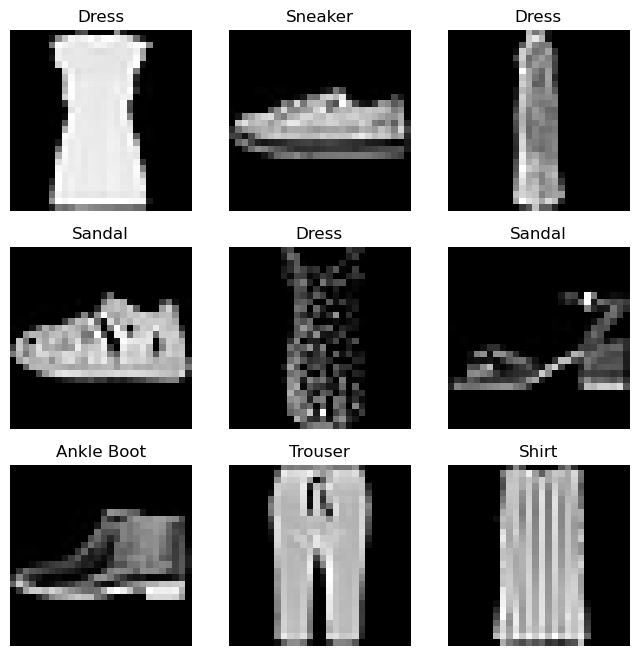

In [23]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


## Creating a Custom Dataset for your files

A custom Dataset class must implement three functions: `__init__`, `__len__`, and `__getitem__`. 
Take a look at this implementation; the FashionMNIST images are stored 
in a directory ``img_dir``, and their labels are stored separately in a CSV file ``annotations_file``. 

In the next sections, we'll break down what's happening in each of these functions.



In [24]:
import os
import pandas as pd
import torchvision.io as tvio

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = tvio.read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = {"image": image, "label": label}
        return sample

### init

The `__init__` function is run once when instantiating the Dataset object. We initialize
the directory containing the images, the annotations file, and both transforms (covered 
in more detail in the next section). 

The labels.csv file looks like:
```

    tshirt1.jpg, 0
    tshirt2.jpg, 0
    ......
    ankleboot999.jpg, 9
```
Example:
```
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform
```

### len

The `__len__` function returns the number of samples in our dataset.

Example:
```
def __len__(self):
    return len(self.img_labels)
```


### getitem

The `__getitem__` function loads and returns a sample from the dataset at the given index `idx`. 
Based on the index, it identifies the image's location on disk, converts that to a tensor using `read_image`, retrieves the 
corresponding label from the csv data in `self.img_labels`, calls the transform functions on them (if applicable), and returns the 
tensor image and corresponding label in a Python `dict`.

Example:
```
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    sample = {"image": image, "label": label}
    return sample
```

## Preparing your data for training with DataLoaders

The ``Dataset`` retrieves our dataset's features and labels one sample at a time. While training a model, we typically want to 
pass samples in "minibatches", reshuffle the data at every epoch to reduce model overfitting, and use Python's ``multiprocessing`` to
speed up data retrieval.

``DataLoader`` is an iterable that abstracts this complexity for us in an easy API.



In [25]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## Iterate through the DataLoader

We have loaded that dataset into the `Dataloader` and can iterate through the dataset as needed.
Each iteration below returns a batch of `train_features` and `train_labels`(containing `batch_size=64` features and labels respectively). Because we specified `shuffle=True`, after we iterate over all batches the data is shuffled (for finer-grained control over  the data loading order, take a look at [Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler>).



Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


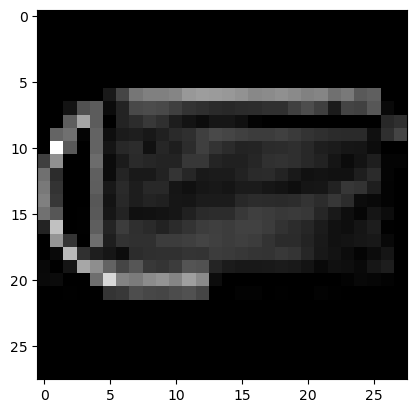

Label: 8


In [26]:
# Display image and label
train_features,train_labels=next(iter(train_dataloader))
print("Feature batch shape:",train_features.size())
print("Labels batch shape:",train_labels.size())
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [27]:
%reset -f

# Transform the data

## Transforms

Data does not always come in its final processed form that is required for 
training machine learning algorithms. We use **transforms** to perform some
manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters (`transform` to modify the features and
`target_transform` to modify the labels) that accept callables containing the transformation logic.
The [torchvision.transforms](https://pytorch.org/vision/stable/transforms.html) module offers 
several commonly-used transforms out of the box.

The FashionMNIST features are in PIL Image format, and the labels are integers.
For training, we need the features as normalized tensors, and the labels as one-hot encoded tensors.
To make these transformations, we use `ToTensor` and `Lambda`.

In [28]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor, target_transform=Lambda(
    lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)))


## ToTensor()

[ToTensor](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToTensor) 
converts a PIL image or NumPy `ndarray` into a `FloatTensor` and scales the image's pixel intensity values in the range \[0., 1.\]

## Lambda transforms

Lambda transforms apply any user-defined lambda function. Here, we define a function 
to turn the integer into a one-hot encoded tensor. 
It first creates a zero tensor of size 10 (the number of labels in our dataset) and calls 
[scatter](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.scatter_) which assigns a 
`value=1` on the index as given by the label `y`.

In [29]:
%reset -f

# Building the model layers

## Build a neural network

Neural networks comprise of layers/modules that perform operations on data. 
The [torch.nn](https://pytorch.org/docs/stable/nn.html) namespace provides all the building blocks you need to 
build your own neural network. Every module in PyTorch subclasses the [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). 
A neural network is a module itself that consists of other modules (layers). This nested structure allows for
building and managing complex architectures easily.

In the following sections, we'll build a neural network to classify images in the FashionMNIST dataset.

In [30]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## Get a hardware device for training

We want to be able to train our model on a hardware accelerator like the GPU, 
if it is available. Let's check to see if 
[torch.cuda](https://pytorch.org/docs/stable/notes/cuda.html) is available, else we 
continue to use the CPU.

In [31]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using %s device" % device)

Using cuda device


## Define the class

We define our neural network by subclassing `nn.Module`, and 
initialize the neural network layers in `__init__`. Every `nn.Module` subclass implements
the operations on input data in the `forward` method.

In [32]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

We create an instance of `NeuralNetwork`, and move it to the `device`, and print 
it's structure.



In [33]:
network=NeuralNetwork()
model=network.to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


To use the model, we pass it the input data. This executes the model's `forward`,
along with some [background operations](https://github.com/pytorch/pytorch/blob/270111b7b611d174967ed204776985cefca9c144/torch/nn/modules/module.py#L866). 
Do not call `model.forward()` directly!

Calling the model on the input returns a 10-dimensional tensor with raw predicted values for each class.
We get the prediction densities by passing it through an instance of the `nn.Softmax` module.

In [34]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


### nn.Flatten

We initialize the [nn.Flatten](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) 
layer to convert each 2D 28x28 image into a contiguous array of 784 pixel values (the minibatch dimension (at dim=0) is maintained).



In [35]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


### nn.Linear 

The [linear layer](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
is a module that applies a linear transformation on the input using it's stored weights and biases.

In [36]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


### nn.ReLU

Non-linear activations are what create the complex mappings between the model's inputs and outputs.
They are applied after linear transformations to introduce *nonlinearity*, helping neural networks
learn a wide variety of phenomena.

In this model, we use [nn.ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) between our
linear layers, but there's other activations to introduce non-linearity in your model.

In [37]:
print("Before ReLU:",hidden1,"\n\n")
hidden1 = nn.ReLU()(hidden1)
print("After ReLU:",hidden1)

Before ReLU: tensor([[-0.0205,  0.3410,  0.2285, -0.2982,  0.0852, -0.1143,  0.6446, -0.1967,
         -0.0092,  0.4025, -0.2677, -0.0352, -0.0238, -0.5299,  0.3413, -0.1175,
         -0.0326, -0.1016,  0.2041,  0.1853],
        [ 0.0624,  0.5551,  0.3610, -0.0781,  0.3639,  0.1457,  0.2241,  0.0744,
          0.1176,  0.4466, -0.1731, -0.0623, -0.0561, -0.1868,  0.3329, -0.0619,
          0.2632, -0.2132, -0.1954,  0.2051],
        [ 0.0356,  0.3103,  0.3041,  0.0932,  0.2046,  0.2673,  0.5635,  0.1199,
          0.1497,  0.3939, -0.2110,  0.2747,  0.2651, -0.1578,  0.4799,  0.3947,
          0.0220, -0.0629, -0.2226,  0.0268]], grad_fn=<AddmmBackward0>) 


After ReLU: tensor([[0.0000, 0.3410, 0.2285, 0.0000, 0.0852, 0.0000, 0.6446, 0.0000, 0.0000,
         0.4025, 0.0000, 0.0000, 0.0000, 0.0000, 0.3413, 0.0000, 0.0000, 0.0000,
         0.2041, 0.1853],
        [0.0624, 0.5551, 0.3610, 0.0000, 0.3639, 0.1457, 0.2241, 0.0744, 0.1176,
         0.4466, 0.0000, 0.0000, 0.0000, 0.0000, 0.3

### nn.Sequential

[nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) is an ordered 
container of modules. The data is passed through all the modules in the same order as defined. You can use
sequential containers to put together a quick network like `seq_modules`.



In [38]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

### nn.Softmax

The last linear layer of the neural network returns `logits` - raw values in \[`-infty`, `infty`] - which are passed to the
[nn.Softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) module. The logits are scaled to values \[0, 1\] representing the model's predicted densities for each class. `dim` parameter indicates the dimension along which the values must sum to 1.

In [39]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

## Model parameters

Many layers inside a neural network are *parameterized*, i.e. have associated weights 
and biases that are optimized during training. Subclassing `nn.Module` automatically 
tracks all fields defined inside your model object, and makes all parameters 
accessible using your model's `parameters()` or `named_parameters()` methods.

In this example, we iterate over each parameter, and print its size and a preview of its values.


In [40]:
for name,parameters in model.named_parameters():
    print("Layer:",name,"Size:",parameters.size(),"Values:",parameters[:2])

Layer: linear_relu_stack.0.weight Size: torch.Size([512, 784]) Values: tensor([[ 0.0269,  0.0061,  0.0117,  ..., -0.0098, -0.0298, -0.0292],
        [-0.0175,  0.0101, -0.0316,  ...,  0.0123,  0.0318, -0.0207]],
       device='cuda:0', grad_fn=<SliceBackward0>)
Layer: linear_relu_stack.0.bias Size: torch.Size([512]) Values: tensor([0.0095, 0.0264], device='cuda:0', grad_fn=<SliceBackward0>)
Layer: linear_relu_stack.2.weight Size: torch.Size([512, 512]) Values: tensor([[-0.0309, -0.0197, -0.0285,  ..., -0.0177,  0.0218, -0.0275],
        [-0.0067,  0.0138, -0.0407,  ..., -0.0142, -0.0128,  0.0245]],
       device='cuda:0', grad_fn=<SliceBackward0>)
Layer: linear_relu_stack.2.bias Size: torch.Size([512]) Values: tensor([0.0268, 0.0234], device='cuda:0', grad_fn=<SliceBackward0>)
Layer: linear_relu_stack.4.weight Size: torch.Size([10, 512]) Values: tensor([[ 0.0331, -0.0402,  0.0383,  ..., -0.0375, -0.0087,  0.0244],
        [ 0.0427,  0.0225,  0.0426,  ..., -0.0080, -0.0210,  0.0112]],
 

In [41]:
%reset -f

# Automatic differentiation

## Automatic differentiation with ``torch.autograd``

When training neural networks, the most frequently used algorithm is
**back propagation**. In this algorithm, parameters (model weights) are
adjusted according to the **gradient** of the loss function with respect
to the given parameter.

To compute those gradients, PyTorch has a built-in differentiation engine
called `torch.autograd`. It supports automatic computation of gradient for any
computational graph.

Consider the simplest one-layer neural network, with input `x`,
parameters `w` and `b`, and some loss function. It can be defined in
PyTorch in the following manner:

In [42]:
import torch
x=torch.ones(5)
y=torch.zeros(3)
w=torch.randn((5,3),requires_grad=True)
b=torch.randn((3),requires_grad=True)
z=torch.matmul(x,w)+b
loss=torch.nn.functional.binary_cross_entropy_with_logits(z,y)

## Tensors, Functions and Computational graph

This code defines the following **computational graph**:

![Diagram showing a computational graph with two parameters 'w' and 'b' to compute the gradients of loss.](./images/computational-graph.png)

In this network, `w` and `b` are **parameters**, which we need to
optimize. Thus, we need to be able to compute the gradients of loss
function with respect to those variables. In order to do that, we set
the `requires_grad` property of those tensors.

> **Note:** You can set the value of `requires_grad` when creating a tensor, or later by using `x.requires_grad_(True)` method.

A function that we apply to tensors to construct computational graph is
in fact an object of class `Function`. This object knows how to
compute the function in the *forward* direction, and also how to compute
its derivative during the *backward propagation* step. A reference to
the backward propagation function is stored in `grad_fn` property of a
tensor. You can find more information of `Function` [in the
documentation](https://pytorch.org/docs/stable/autograd.html#function).

In [43]:
print('Gradient function for z =',z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x7f2cac2866d0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7f2cac286fd0>


## Computing gradients

To optimize weights of parameters in the neural network, we need to
compute the derivatives of our loss function with respect to parameters,
namely, we need $\frac{\partial loss}{\partial w}$ and
$\frac{\partial loss}{\partial b}$ under some fixed values of
`x` and `y`. To compute those derivatives, we call
`loss.backward()`, and then retrieve the values from `w.grad` and
`b.grad`:

In [44]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.3276, 0.0206, 0.2834],
        [0.3276, 0.0206, 0.2834],
        [0.3276, 0.0206, 0.2834],
        [0.3276, 0.0206, 0.2834],
        [0.3276, 0.0206, 0.2834]])
tensor([0.3276, 0.0206, 0.2834])


> **Note:** We can only obtain the `grad` properties for the leaf nodes of the computational graph, which have `requires_grad` property set to ``True``. For all other nodes in our graph, gradients will not be available. In addition, we can only perform gradient calculations using ``backward`` once on a given graph, for performance reasons. If we need to do several ``backward`` calls on the same graph, we need to pass ``retain_graph=True`` to the ``backward`` call.

## Disabling gradient tracking

By default, all tensors with `requires_grad=True` are tracking their
computational history and support gradient computation. However, there
are some cases when we do not need to do that, for example, when we have
trained the model and just want to apply it to some input data, i.e. we
only want to do *forward* computations through the network. We can stop
tracking computations by surrounding our computation code with
`torch.no_grad()` block:

In [45]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


Another way to achieve the same result is to use the ``detach()`` method
on the tensor:




In [46]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


There are reasons you might want to disable gradient tracking:
  - To mark some parameters in your neural network at **frozen parameters**. This is
    a very common scenario for
    [fine tuning a pre-trained network](https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html)
  - To **speed up computations** when you are only doing forward pass, because computations on tensors that do
    not track gradients would be more efficient.



More on Computational Graphs
----------------------------
Conceptually, autograd keeps a record of data (tensors) and all executed
operations (along with the resulting new tensors) in a directed acyclic
graph (DAG) consisting of
[Function](https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
objects. In this DAG, leaves are the input tensors, roots are the output
tensors. By tracing this graph from roots to leaves, you can
automatically compute the gradients using the chain rule.

In a forward pass, autograd does two things simultaneously:

- run the requested operation to compute a resulting tensor
- maintain the operation’s *gradient function* in the DAG.

The backward pass kicks off when `.backward()` is called on the DAG
root. `autograd` then:

- computes the gradients from each `.grad_fn`,
- accumulates them in the respective tensor’s `.grad` attribute
- using the chain rule, propagates all the way to the leaf tensors.

**DAGs are dynamic in PyTorch**

  An important thing to note is that the graph is recreated from scratch; after each
  `.backward()` call, autograd starts populating a new graph. This is
  exactly what allows you to use control flow statements in your model;
  you can change the shape, size and operations at every iteration if
  needed.



## Optional reading: Tensor gradients and Jacobian products

In many cases, we have a scalar loss function, and we need to compute
the gradient with respect to some parameters. However, there are cases
when the output function is an arbitrary tensor. In this case, PyTorch
allows you to compute so-called **Jacobian product**, and not the actual
gradient.

For a vector function $\vec{y}=f(\vec{x})$, where
$\vec{x}=\langle x_1,\dots,x_n\rangle$ and
$\vec{y}=\langle y_1,\dots,y_m\rangle$, a gradient of
$\vec{y}$ with respect to $\vec{x}$ is given by **Jacobian
matrix**:

\begin{align}J=\left(\begin{array}{ccc}
      \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
      \vdots & \ddots & \vdots\\
      \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
      \end{array}\right)\end{align}

Instead of computing the Jacobian matrix itself, PyTorch allows you to
compute **Jacobian Product** $v^T\cdot J$ for a given input vector
$v=(v_1 \dots v_m)$. This is achieved by calling `backward` with
$v$ as an argument. The size of $v$ should be the same as
the size of the original tensor, with respect to which we want to
compute the product:




In [47]:
inp = torch.eye(5, requires_grad=True)
out = (inp+1).pow(2)
out.backward(torch.ones_like(inp), retain_graph=True)
print("First call\n", inp.grad)
out.backward(torch.ones_like(inp), retain_graph=True)
print("\nSecond call\n", inp.grad)
inp.grad.zero_()
out.backward(torch.ones_like(inp), retain_graph=True)
print("\nCall after zeroing gradients\n", inp.grad)

First call
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])

Second call
 tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.],
        [4., 4., 4., 4., 8.]])

Call after zeroing gradients
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])


Notice that when we call `backward` for the second time with the same
argument, the value of the gradient is different. This happens because
when doing `backward` propagation, PyTorch **accumulates the
gradients**, i.e. the value of computed gradients is added to the
`grad` property of all leaf nodes of computational graph. If you want
to compute the proper gradients, you need to zero out the `grad`
property before. In real-life training an *optimizer* helps us to do
this.



> **Note:** previously we were calling `backward()` function without parameters. This is equivalent to calling `backward(torch.tensor(1.0))`, which is a useful way to compute the gradients in case of a scalar-valued function, such as loss during neural network training.



In [48]:
%reset -f

# Learn about the optimization loop

## Optimizing the model parameters

Now that we have a model and data it's time to train, validate and test our model by optimizing its parameters on our data. Training a model is an iterative process; in each iteration (called an *epoch*) the model makes a guess about the output, calculates the error in its guess (*loss*), collects the derivatives of the error with respect to its parameters (as we saw in the module), and **optimizes** these parameters using gradient descent. For a more detailed walkthrough of this process, check out this video on [backpropagation from 3Blue1Brown](https://www.youtube.com/watch?v=tIeHLnjs5U8).

## Prerequisite code 

We load the code from the previous modules on **Datasets & DataLoaders** and **Build Model**



In [49]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

device="cuda" if torch.cuda.is_available() else "cpu"

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork,self).__init__()
        self.flatten=nn.Flatten()
        self.linear_relu_stack=nn.Sequential(
            nn.Linear(28*28,512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10),
            nn.ReLU()
        )
    
    def forward(self,x):
        x=self.flatten(x)
        logits=self.linear_relu_stack(x)
        return logits

model=NeuralNetwork().to(device)

## Add a loss function

When presented with some training data, our untrained network is likely not to give the correct 
answer. **Loss function** measures the degree of dissimilarity of obtained result to the target value, 
and it is the loss function that we want to minimize during training. To calculate the loss we make a 
prediction using the inputs of our given data sample and compare it against the true data label value.

Common loss functions include [nn.MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) (Mean Square Error) for regression tasks, and 
[nn.NLLLoss](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss) (Negative Log Likelihood) for classification. 
[nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) combines `nn.LogSoftmax` and `nn.NLLLoss`.

We pass our model's output logits to `nn.CrossEntropyLoss`, which will normalize the logits and compute the prediction error.

In [50]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

## Setting hyperparameters 

Hyperparameters are adjustable parameters that let you control the model optimization process. 
Different hyperparameter values can impact model training and convergence rates 
([read more](https://pytorch.org/tutorials/beginner/hyperparameter_tuning_tutorial.html) about hyperparameter tuning)

We define the following hyperparameters for training:
 - **Number of Epochs** - the number times to iterate over the dataset
 - **Batch Size** - the number of data samples seen by the model in each epoch
 - **Learning Rate** - how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.

In [51]:
learning_rate = 0.001
batch_size = 64
epochs = 10

## Optimization pass

Optimization is the process of adjusting model parameters to reduce model error in each training step. **Optimization algorithms** define how this process is performed (in this example we use Stochastic Gradient Descent).
All optimization logic is encapsulated in  the ``optimizer`` object. Here, we use the SGD optimizer; additionally, there are many [different optimizers](https://pytorch.org/docs/stable/optim.html) 
available in PyTorch such as ADAM and RMSProp, that work better for different kinds of models and data.

We initialize the optimizer by registering the model's parameters that need to be trained, and passing in the learning rate hyperparameter.



In [52]:
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

Inside the training loop, optimization happens in three steps:
 * Call `optimizer.zero_grad()` to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
 * Back-propagate the prediction loss with a call to `loss.backwards()`. PyTorch deposits the gradients of the loss w.r.t. each parameter. 
 * Once we have our gradients, we call ``optimizer.step()`` to adjust the parameters by the gradients collected in the backward pass.

## Add an optimization loop

Once we set our hyperparameters, we can then train and optimize our model with an optimization loop. Each 
iteration of the optimization loop is called an **epoch**. 

Each epoch consists of two main parts:
 - **The Train Loop** - iterate over the training dataset and try to converge to optimal parameters.
 - **The Validation/Test Loop** - iterate over the test dataset to check if model performance is improving.

Let's briefly familiarize ourselves with some of the concepts used in the training loop. Jump ahead to 
see the `full-impl-label` of the optimization loop.



In [53]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)


In [54]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (x, y) in enumerate(dataloader):
        x, y = x.to(device), y.to(device)
        pred = model(x)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (batch % 100 == 0):
            loss, current = loss.item(), batch * len(x)
            print("loss: %7f [%d/%d]" % (loss, current, size))


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            pred = model(x)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= size
    correct /= size

    print("Test Error: \n Accuracy: %f, Avg loss: %f \n" %
          (correct, test_loss))


We initialize the loss function and optimizer, and pass it to `train_loop` and `test_loop`.
Feel free to increase the number of epochs to track the model's improving performance.

In [55]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.297114 [0/60000]
loss: 2.294100 [6400/60000]
loss: 2.280498 [12800/60000]
loss: 2.283228 [19200/60000]
loss: 2.270761 [25600/60000]
loss: 2.271281 [32000/60000]
loss: 2.256567 [38400/60000]
loss: 2.251194 [44800/60000]
loss: 2.247042 [51200/60000]
loss: 2.227546 [57600/60000]
Test Error: 
 Accuracy: 0.421600, Avg loss: 0.035049 

Epoch 2
-------------------------------
loss: 2.231293 [0/60000]
loss: 2.227190 [6400/60000]
loss: 2.197152 [12800/60000]
loss: 2.204241 [19200/60000]
loss: 2.171971 [25600/60000]
loss: 2.191088 [32000/60000]
loss: 2.153605 [38400/60000]
loss: 2.151736 [44800/60000]
loss: 2.156397 [51200/60000]
loss: 2.107423 [57600/60000]
Test Error: 
 Accuracy: 0.413500, Avg loss: 0.033221 

Epoch 3
-------------------------------
loss: 2.133103 [0/60000]
loss: 2.104698 [6400/60000]
loss: 2.044510 [12800/60000]
loss: 2.053147 [19200/60000]
loss: 2.006043 [25600/60000]
loss: 2.062222 [32000/60000]
loss: 1.982962 [38400/60000]
lo

In [56]:
%reset -f

# Save, load, and run model predictions

## Save and load the model

In this unit we will look at how to persist model state with saving, loading and running model predictions.


In [57]:
import torch
import torch.onnx as onnx
import torchvision.models as models

## Saving and loading model weights

PyTorch models store the learned parameters in an internal state dictionary, called `state_dict`. These can be persisted via the `torch.save` method:



In [58]:
model = models.AlexNet()
torch.save(model.state_dict(), 'data/model_weights.pth')

To load model weights, you need to create an instance of the same model first, and then load the parameters using the `load_state_dict()` method.



In [59]:
model = models.AlexNet() # we do not specify pretrained=True, i.e. do not load default weights
model.load_state_dict(torch.load('data/model_weights.pth'))
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

> **Note:** Be sure to call `model.eval()` method before inferencing to set the dropout and batch normalization layers to evaluation mode. Failing to do this will yield inconsistent inference results.


## Saving and loading models with shapes

When loading model weights, we needed to instantiate the model class first, because the class defines the structure of a network. We might want to save the structure of this class together with the model, in which case we can pass `model` (and not `model.state_dict()`) to the saving function:

In [60]:
torch.save(model, 'data/alex_model.pth')

We can then load the model like this:

In [61]:
model = torch.load('data/alex_model.pth')

> **Note:** This approach uses Python [pickle](https://docs.python.org/3/library/pickle.html) module when serializing the model, thus it relies on the actual class definition to be available when loading the model.


## Exporting the model to ONNX

PyTorch also has native ONNX export support. Given the dynamic nature of the PyTorch execution graph, however, the export process must traverse the execution graph to produce a persisted ONNX model. For this reason, a test variable of the appropriate size should be passed in to the export routine (in our case, we will create a dummy zero tensor of the correct size):

In [62]:
input_image = torch.zeros((1,3,224,224))
onnx.export(model, input_image, 'data/model.onnx')

There are a lot of things you can do with ONNX model, including running inference on different platforms and in different programming languages. For more details, we recommend visiting [ONNX tutorial](https://github.com/onnx/tutorials).

Congratulations! You have completed the PyTorch beginner tutorial! We hope this tutorial has helped you get started with deep learning on PyTorch.